In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import data file (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

#Checking file read
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [2]:
#Check for missing data
purchase_data.count()

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

## Player Count

In [3]:
# Get a count on the number of unique players

player_count = len(purchase_data["SN"].unique())

print("               Player Count")
print ("There are", player_count, "unique players in this database")


               Player Count
There are 576 unique players in this database


## Purchasing Analysis (Total)

In [4]:
#Run basic calculations to obtain number of unique items, average price, number of purchases, and total revenue and print data.
unique_items = len(purchase_data["Item ID"].unique())
average_price = round(purchase_data ["Price"].mean(),2)

number_of_purchases = (purchase_data["Item ID"].count())
                       
total_revenue = (purchase_data["Price"].sum())

#Create an output table with the stats

pd.options.display.float_format = '${:,.2f}'.format


revenue_stats = pd.DataFrame({"Number_of_Unique_Items": [unique_items],
                              "Average Item Price": [average_price],
                              "Number of Items Purchased": [number_of_purchases],
                              "Total Revenue": [total_revenue]})


print("                          Purchasing Analysis (Total)")
revenue_stats

                          Purchasing Analysis (Total)


,Number_of_Unique_Items,Average Item Price,Number of Items Purchased,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

In [5]:
# Get the count of genders: male, female, and other for unique users 
#1st, I did a group by
gender_counts=purchase_data.groupby(["Gender"])

#Next, I needed to udentify gender counts for unique users
#gender_by_user = gender_counts.nunique()["SN"]
gender_by_user = gender_counts["SN"].nunique()

#Next I calculated the percent of genders.
percent_gender = (gender_by_user/player_count*100)


#Create an output table with the stats
gender_stats = pd.DataFrame({"Gender of Players": gender_by_user, 
                             "Gender as a Percent of Total Players": percent_gender})


#format and sort table based on gender count
gender_stats=gender_stats.sort_values("Gender of Players", ascending=False).style.format({"Gender as a Percent of Total Players":"{:.2f}%"})

print("                        Gender Demographics")
gender_stats

                        Gender Demographics


,Gender of Players,Gender as a Percent of Total Players
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


([<matplotlib.patches.Wedge at 0x22522cd6be0>,
 [Text(0.4349256924795741, -1.1184094250412784, 'Male'),
  Text(-0.3364934092638907, 1.0472689174810659, 'Female'),
  Text(-0.7987373618758993, 0.7563191302244899, 'Other/ND')],
 [Text(0.25370665394641817, -0.6524054979407458, '84.0%'),
  Text(-0.18354185959848582, 0.5712375913533086, '14.1%'),
  Text(-0.43567492465958135, 0.41253770739517626, '1.9%')])

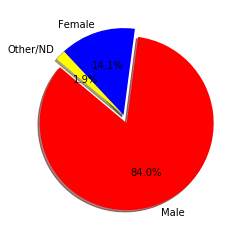

In [6]:
#Get pie chart for data analysis report
# Labels for the sections of our pie chart
labels = ["Male", "Female", "Other/ND"]

# The values of each section of the pie chart
sizes = [484, 81, 11]

# The colors of each section of the pie chart
colors = ["red", "blue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Purchasing Analysis (Gender)

In [7]:
#Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender
#Using gender_counts from a previous line

#Purchase count by gender
gender_counts=purchase_data.groupby(["Gender"])

purchase_by_gender=gender_counts["Item ID"].count()

#Total revenue by gender
revenue_by_gender= (gender_counts["Price"].sum())

#Average purchase price by gender
average_price_by_gender = (revenue_by_gender/purchase_by_gender)

#Average purchase price by unique player
average_price_by_unique_player_gender= (revenue_by_gender/gender_by_user)

#Create an output table with the stats
gender_sales = pd.DataFrame({
                            "Purchases": purchase_by_gender,
                             "Total Revenue by Gender": revenue_by_gender,
                             "Average Sale by Gender": average_price_by_gender,
                            "Average Sale Price per Person": average_price_by_unique_player_gender
})

#format and sort table based on purchses by gender
gender_sales=gender_sales.sort_values("Purchases", ascending=False)

print("                                     Purchasing Analysis (Gender)")
gender_sales

                                     Purchasing Analysis (Gender)


,Purchases,Total Revenue by Gender,Average Sale by Gender,Average Sale Price per Person
Gender,,,,
Male,652,"$1,967.64",$3.02,$4.07
Female,113,$361.94,$3.20,$4.47
Other / Non-Disclosed,15,$50.19,$3.35,$4.56


## Age Demographics

In [22]:
# Establish bins and groups for ages
#Bins are 0, 9, 14, 19, 24, 29, 34, 39, 100.
bins=[0, 9, 14, 19, 24, 29, 34, 39, 100]
groups=["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

#Categorize the existing players using the age bins. Hint: use pd.cut()
purchase_data["Age Groups"] = pd.cut(purchase_data["Age"], bins, labels=groups) 

#Calculate the number of buyers in each group
group_by_age_count=purchase_data.groupby(["Age Groups"])

purchased_by_age=group_by_age_count["SN"].nunique()

#Calculate the numbers and percentages by age group
percent_purchased_by_age= (purchased_by_age/player_count)*100


#Create dataFrame
age_df = pd.DataFrame({"Number of Purchases by Age": purchased_by_age,
                       "Percent of Purchases by Age": round(percent_purchased_by_age, 2),
                      }) 
age_df=age_df.style.format({"Gender as a Percent of Total Players":"{:.2f}%"})
                             
print("                       Age Demographics")
age_df

                       Age Demographics


,Number of Purchases by Age,Percent of Purchases by Age
Age Groups,,
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


([<matplotlib.axis.XTick at 0x22524384b00>,
 <a list of 8 Text xticklabel objects>)

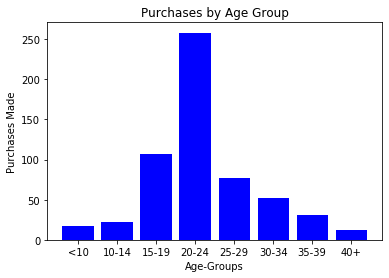

In [20]:
#Get bar chart for data analysis report
Age = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
Purchased = [17, 22, 107, 258, 77, 52, 31, 12]
x_axis = np.arange(len(Purchased))

#plot chart by Age, color="b", align="center")
plt.bar(x_axis, Purchased, color="b", align="center")

# Give the chart a title, x label, and y label
plt.title("Purchases by Age Group")
plt.xlabel("Age-Groups")
plt.ylabel("Purchases Made")

#Set values for x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"])


## Purchasing Analysis (Age)

In [8]:
#Bin the purchase_data data frame by age
# Establish bins and groups for ages
#Bins are 0, 9, 14, 19, 24, 29, 34, 39, 100.
bins=[0, 9, 14, 19, 24, 29, 34, 39, 100]
groups=["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

#Run basic calculations to obtain purchase count, avg. 
#purchase price, avg. 
#purchase total per person etc. in the table below

average_purchase_count=group_by_age_count["Purchase ID"].count()
average_purchase_price=group_by_age_count["Price"].mean()
total_purchases_by_age=group_by_age_count["Price"].sum()
average_purchase_price_by_age_group =total_purchases_by_age/purchased_by_age


#Create a summary data frame to hold the results
purchase_values_by_age = pd.DataFrame({"Number Purchased by Age":average_purchase_count,
                                       "Average Purchase Price by Age": average_purchase_price,
                                       "Total Purchased by Age": total_purchases_by_age, 
                                       "Average Purchase Price per Person": average_purchase_price_by_age_group})

#Optional: give the displayed data cleaner formatting
# Format with currency style

#Display the summary data frame

print("                                     Purchasing Analysis (Age)")
purchase_values_by_age

                                     Purchasing Analysis (Age)


,Number Purchased by Age,Average Purchase Price by Age,Total Purchased by Age,Average Purchase Price per Person
Age Groups,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

In [23]:
#Capture top-spender by unique player name
top_spenders=purchase_data.groupby(["SN"])

#get purchase count by player
purchase_by_player=top_spenders["SN"].count()

#get average purchase price per player
average_purchase_price_by_player= (top_spenders["Price"].mean())

#Get total purchase values by player
total_revenue_by_player=(purchase_by_player*average_purchase_price_by_player)

top_spenders_df=pd.DataFrame({"Number Purchased by Player":purchase_by_player,
                                       "Average Purchase Price by Player": average_purchase_price_by_player,
                                       "Total Revenue by Player": total_revenue_by_player})


top_spenders_df = top_spenders_df.sort_values("Total Revenue by Player", ascending=False)
print("                                 Top Spenders by Player")
top_spenders_df.head(10)

                                 Top Spenders by Player


,Number Purchased by Player,Average Purchase Price by Player,Total Revenue by Player
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10
Ilarin91,3,$4.23,$12.70
Ialallo29,3,$3.95,$11.84
Tyidaim51,3,$3.94,$11.83
Lassilsala30,3,$3.84,$11.51


In [91]:
#Capture top spender by age-group
#Sort the total purchase value column in descending order
purchase_sort = purchase_values_by_age.sort_values("Total Purchased by Age", ascending=False)
print("                                              Top Spenders by Age Group")
purchase_sort
#Optional: give the displayed data cleaner formatting

#Display a preview of the summary data frame

                                              Top Spenders by Age Group


,Number Purchased by Age,Average Purchase Price by Age,Total Purchased by Age,Average Purchase Price per Person
Age Groups,,,,
20-24,365,$3.05,"$1,114.06",$4.32
15-19,136,$3.04,$412.89,$3.86
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
10-14,28,$2.96,$82.78,$3.76
<10,23,$3.35,$77.13,$4.54
40+,13,$2.94,$38.24,$3.19


([<matplotlib.axis.XTick at 0x225243f2048>,
 <a list of 8 Text xticklabel objects>)

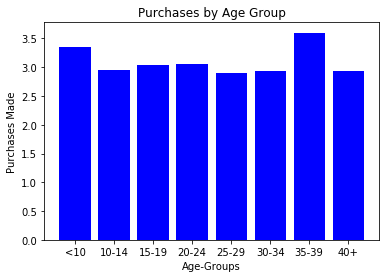

In [21]:
#Get bar chart for data analysis report
Age = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
Purchased = [3.35, 2.96, 3.04, 3.05, 2.90, 2.93, 3.60, 2.94]
x_axis = np.arange(len(Purchased))

#plot chart by Age, color="b", align="center")
plt.bar(x_axis, Purchased, color="b", align="center")

# Give the chart a title, x label, and y label
plt.title("Purchases by Age Group")
plt.xlabel("Age-Groups")
plt.ylabel("Purchases Made")

#Set values for x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"])


## Most Popular Items

In [64]:
#Retrieve the Item ID, Item Name, and Item Price columns
item_id = purchase_data["Item ID"]
item_name = purchase_data["Item Name"]
item_price = purchase_data["Price"]

#Group by Item ID and Item Name. 
price_group_by=purchase_data.groupby(["Item ID", "Item Name"])

#Perform calculations to obtain purchase count
purchase_count = price_group_by["Purchase ID"].count()

#Perform calculations to obtainand total purchase value
purchase_value = price_group_by["Price"].sum()

#Perform calculations to obtain item price
purchase_price = purchase_value/purchase_count

#Create a summary data frame to hold the results
purchase_values_by_item = pd.DataFrame({"Number Purchased by Item":purchase_count,
                                       "Purchase Price by Item": purchase_price,
                                       "Total Purchased Value": purchase_value })

#Sort the purchase count column in descending order
purchase_item_sort = purchase_values_by_item.sort_values("Number Purchased by Item", ascending=False)

#Display a preview of the summary data frame
print("                                        Most Popular Items")
purchase_item_sort.head(10)

                                        Most Popular Items


,,Number Purchased by Item,Purchase Price by Item,Total Purchased Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16
103,Singed Scalpel,8,$4.35,$34.80
75,Brutality Ivory Warmace,8,$2.42,$19.36
72,Winter's Bite,8,$3.77,$30.16
60,Wolf,8,$3.54,$28.32


## Most Profitable Items

In [22]:
#Retrieve the Item ID, Item Name, and Item Price columns
item_id = purchase_data["Item ID"]
item_name = purchase_data["Item Name"]
item_price = purchase_data["Price"]

#Group by Item ID and Item Name. 
price_group_by=purchase_data.groupby(["Item ID", "Item Name"])

#Perform calculations to obtain purchase count
purchase_count = price_group_by["Purchase ID"].count()

#Perform calculations to obtainand total purchase value
purchase_value = price_group_by["Price"].sum()

#Perform calculations to obtain item price
purchase_price = purchase_value/purchase_count

#Create a summary data frame to hold the results
purchase_values_by_item = pd.DataFrame({"Number Purchased by Item":purchase_count,
                                       "Purchase Price by Item": purchase_price,
                                       "Total Purchased Value": purchase_value })

#Sort the purchase count column in descending order
profit_by_item_sort = purchase_values_by_item.sort_values("Total Purchased Value", ascending=False)

#Display a preview of the summary data frame
print("                                        Most Popular Items")
profit_by_item_sort.head(10)

                                        Most Popular Items


,,Number Purchased by Item,Purchase Price by Item,Total Purchased Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80
59,"Lightning, Etcher of the King",8,$4.23,$33.84
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
78,"Glimmer, Ender of the Moon",7,$4.40,$30.80
72,Winter's Bite,8,$3.77,$30.16
